# W4995-AML Project team 32

This note book represents team project of group 32 for W4995-AML course

## Imports

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')

## Data Loading

In [6]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
meal_info = pd.read_csv('./data/meal_info.csv')
center_info = pd.read_csv('./data/fulfilment_center_info.csv')

## Exploratory Data Analysis

In [7]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [11]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [12]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


**Exciting, there is no obvious missing data**

In [13]:
train_data = pd.merge(train_data,meal_info,on='meal_id',how='left')
train_data = pd.merge(train_data,center_info, on='center_id', how='left')

In [14]:
train_data = train_data.drop(columns=["center_id", "meal_id"])

In [15]:
train_data.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


#### Features: Checkout_price, base_price and region code

In [45]:
features = ['checkout_price','base_price','region_code']
target = train_data['num_orders']
print(f'missing values in checkout price: ', any(train_data['checkout_price'].isnull()))
print(f'missing values in base price: ', any(train_data['base_price'].isnull()))
print(f'missing values in region code: ', any(train_data['region_code'].isnull()))
print(f'missing values in number of orders: ', any(train_data['num_orders'].isnull()))

missing values in checkout price:  False
missing values in base price:  False
missing values in region code:  False
missing values in number of orders:  False


It seems there's no missing valuse in checkout price, base price and region code. Also no missing values in target. 

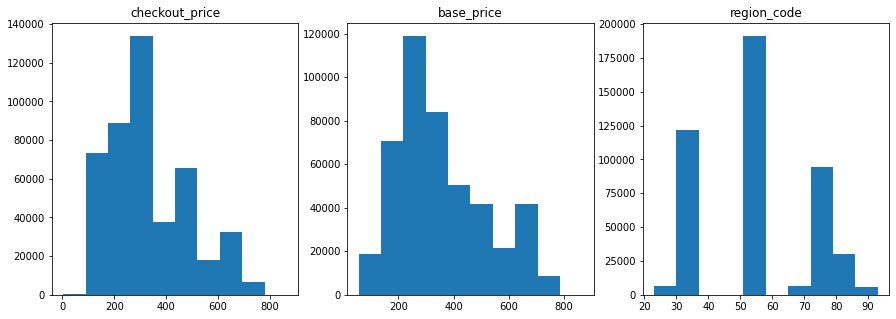

In [42]:
ind = 0
plt.figure(figsize=(15,5))
for i in features:
    ind+=1
    plt.subplot(1,3,ind)
    plt.hist(train_data[i])
    plt.title(i)

For check out and base price, the distributions are a bit skew to the right. For region code distribution, it looks like the data is gathered from several specific regions. 

In [63]:
print(train_data['region_code'].unique())

[56 85 77 34 35 71 93 23]


It's based on 8 regions.

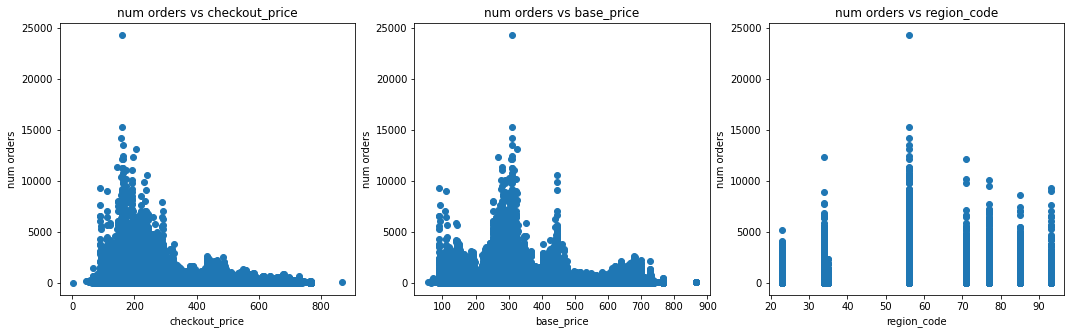

In [49]:
ind = 0
plt.figure(figsize=(18,5))
for i in features:
    ind+=1
    plt.subplot(1,3,ind)
    plt.scatter(train_data[i],target)
    plt.title(f'num orders vs '+i)
    plt.xlabel(i)
    plt.ylabel('num orders')

It doesn't look like there's relationship between check out price, base price, region code and our target. However, at some specific values of the three features, number of orders are higher than others.

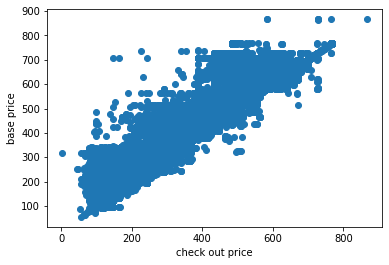

In [58]:
plt.scatter(train_data['checkout_price'],train_data['base_price'])
plt.xlabel('check out price')
plt.ylabel('base price')
plt.show()

There's a linear relationship between check out price and base price (since they are related). 

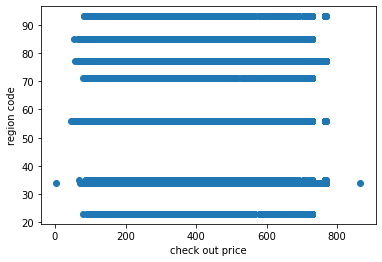

In [65]:
plt.scatter(train_data['checkout_price'],train_data['region_code'])
plt.xlabel('check out price')
plt.ylabel('region code')
plt.show()

There's no relationship between check out price and region code, same for base price and region code.